In [97]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timezone, timedelta
from PIL import Image

# import the widgets
import ipywidgets as widgets

# import the interact and the interact_manual from widgetss
from ipywidgets import interact, interact_manual

# import geopandas and matplotlib
#import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('jan_aug_tempanom.png'))

# import mplot3d
from mpl_toolkits import mplot3d

# import seaborn
import seaborn as sns

# import plotly graph objects
import plotly.graph_objs as go
import plotly.express as px

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import Kmeans 
from sklearn.cluster import KMeans

# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sqlite3
from sqlite3 import Error
import copy

#for showing 3D plot
%matplotlib notebook  

#for showing 2D plot
%matplotlib inline 

In [98]:
# upload datasets
df = pd.read_csv('flights_raw_8900.csv', sep=',')

In [99]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7130 entries, 0 to 7129
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7130 non-null   int64  
 1   fl_date              7130 non-null   object 
 2   mkt_unique_carrier   7130 non-null   object 
 3   branded_code_share   7130 non-null   object 
 4   mkt_carrier          7130 non-null   object 
 5   mkt_carrier_fl_num   7130 non-null   int64  
 6   op_unique_carrier    7130 non-null   object 
 7   tail_num             7097 non-null   object 
 8   op_carrier_fl_num    7130 non-null   int64  
 9   origin_airport_id    7130 non-null   int64  
 10  origin               7130 non-null   object 
 11  origin_city_name     7130 non-null   object 
 12  dest_airport_id      7130 non-null   int64  
 13  dest                 7130 non-null   object 
 14  dest_city_name       7130 non-null   object 
 15  crs_dep_time         7130 non-null   i

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-01-02,DL,DL,DL,1124,DL,N308DE,1124,10397,...,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-01-02,DL,DL,DL,1124,DL,N308DE,1124,14524,...,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018-01-02,DL,DL,DL,1125,DL,N342NB,1125,11057,...,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-01-02,DL,DL,DL,1126,DL,N988DL,1126,10693,...,456.0,3.0,0.0,23.0,0.0,6.0,1850.0,1.0,1.0,NaN
4,4,2018-01-02,DL,DL,DL,1127,DL,N951DL,1127,10397,...,432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2018-01-02,DL,DL,DL,1127,DL,N951DL,1127,12339,...,432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2018-01-02,DL,DL,DL,1128,DL,N876DN,1128,10397,...,1947.0,44.0,0.0,0.0,0.0,9.0,2209.0,28.0,28.0,NaN
7,7,2018-01-02,DL,DL,DL,1130,DL,N665DN,1130,10397,...,907.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2018-01-02,DL,DL,DL,1132,DL,N926AT,1132,10397,...,694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2018-01-02,DL,DL,DL,1133,DL,N3757D,1133,14869,...,689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    dtype = x.dtypes
    count = x.count()
    missing_ = pd.concat([n_missing, p_missing, dtype, count],axis=1, keys = [
        'number',
        'percent',
        'type',
        'count'
    ])
    return missing_

In [101]:
missing(df)

,number,percent,type,count
no_name,7130,1.000000,float64,0
total_add_gtime,7066,0.991024,float64,64
first_dep_time,7066,0.991024,float64,64
longest_add_gtime,7066,0.991024,float64,64
cancellation_code,6948,0.974474,object,182
late_aircraft_delay,5726,0.803086,float64,1404
security_delay,5726,0.803086,float64,1404
nas_delay,5726,0.803086,float64,1404
weather_delay,5726,0.803086,float64,1404
carrier_delay,5726,0.803086,float64,1404


In [102]:
data = copy.deepcopy(df)

In [103]:
data.describe()

,Unnamed: 0,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,6955.000000,6954.000000,6940.000000,6940.000000,...,7130.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,64.000000,64.000000,64.000000,0.0
mean,3564.500000,2668.548527,2668.879663,12687.725806,12653.803787,1321.626227,1321.100359,11.668392,17.644669,1347.948415,...,769.464656,19.747151,2.824074,17.033476,0.131054,30.636752,1249.015625,50.109375,46.906250,NaN
std,2058.398042,1934.320536,1935.025552,1511.232137,1497.386753,479.613952,494.637469,49.326631,10.558559,495.494748,...,614.307857,56.893413,24.119735,33.173569,3.203024,61.953865,530.550582,47.095687,37.777426,NaN
min,0.000000,1.000000,1.000000,10135.000000,10135.000000,8.000000,3.000000,-22.000000,3.000000,5.000000,...,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.000000,NaN
25%,1782.250000,862.250000,862.250000,11292.000000,11292.000000,921.000000,919.500000,-6.000000,11.000000,936.000000,...,332.000000,0.000000,0.000000,0.000000,0.000000,0.000000,807.500000,20.750000,20.750000,NaN
50%,3564.500000,2261.000000,2261.000000,12889.000000,12889.000000,1314.000000,1317.000000,-2.000000,15.000000,1332.000000,...,594.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1233.500000,35.000000,35.000000,NaN
75%,5346.750000,4487.000000,4487.000000,14057.000000,13930.000000,1723.750000,1727.000000,8.000000,20.000000,1743.000000,...,991.000000,16.250000,0.000000,22.000000,0.000000,38.000000,1672.250000,60.250000,60.250000,NaN
max,7129.000000,7400.000000,7400.000000,16101.000000,15991.000000,2359.000000,2400.000000,944.000000,152.000000,2400.000000,...,4983.000000,790.000000,683.000000,404.000000,89.000000,926.000000,2233.000000,221.000000,170.000000,NaN


In [104]:
# cols with > 80% missing values

drop = [
    'no_name',
    'total_add_gtime',
    'first_dep_time',
    'longest_add_gtime',
    'cancellation_code',
]

# missing 80%+ values, but apparently useful?

delay_cols = [
    'late_aircraft_delay',
    'security_delay',
    'nas_delay',
    'weather_delay',
    'carrier_delay'
]

In [105]:
# split city and country

data[['origin_city', 'origin_state']] = data['origin_city_name'].str.split(',', expand=True, n=2)

data[['dest_city', 'dest_state']] = data['dest_city_name'].str.split(',', expand=True, n=2)

# try using just city data, groupby state data?

In [106]:
# removing related carrier identifiers; commented out = used feature

carrier_identifiers = [
    'mkt_unique_carrier',
    'branded_code_share',
    #'mkt_carrier',
    'mkt_carrier_fl_num',
    'op_unique_carrier',
    'tail_num',
    'op_carrier_fl_num',
]

# removing related airport, place identifiers

place_identifiers = [

#origin identifiers
    'origin_airport_id',
    #'origin',
    'origin_city_name',
    #'origin_city',
    #'origin_country',
#destination identifiers
    'dest_airport_id',
    #'dest',
    'dest_city_name',
    #'dest_city',
    #'dest_country',
]

In [107]:
# remove cols

data = data.drop(columns=
                drop+
                delay_cols+ # not really sure what to do with these columns
                carrier_identifiers+
                place_identifiers)

In [108]:
missing(data)

,number,percent,type,count
air_time,215,0.030154,float64,6915
actual_elapsed_time,206,0.028892,float64,6924
arr_delay,206,0.028892,float64,6924
taxi_in,194,0.027209,float64,6936
wheels_on,194,0.027209,float64,6936
taxi_out,190,0.026648,float64,6940
wheels_off,190,0.026648,float64,6940
arr_time,185,0.025947,float64,6945
dep_delay,176,0.024684,float64,6954
dep_time,175,0.024544,float64,6955


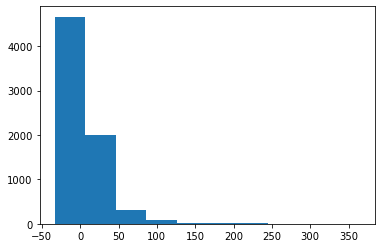

In [75]:

# histogram plot
df2=data['arr_delay']
plt.hist(df2)
plt.show()

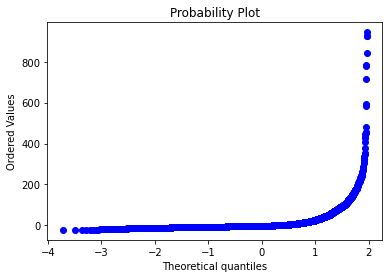

In [73]:
import pylab
import scipy.stats as stats

stats.probplot(data['dep_delay'], dist="norm", plot=pylab)
pylab.show()

In [109]:
# null values - rolling mean (original value = 6)
for i,j in enumerate(missing(data).index):
    if missing(data)['number'].values[i] > 0:
        data[j] = data[j].rolling(6,min_periods=1).mean()

In [111]:
data=data.fillna(data.median())

In [112]:
missing(data)

,number,percent,type,count
dest_state,0,0.0,object,7130
crs_arr_time,0,0.0,int64,7130
fl_date,0,0.0,object,7130
mkt_carrier,0,0.0,object,7130
origin,0,0.0,object,7130
dest,0,0.0,object,7130
crs_dep_time,0,0.0,int64,7130
dep_time,0,0.0,float64,7130
dep_delay,0,0.0,float64,7130
taxi_out,0,0.0,float64,7130


<AxesSubplot:xlabel='dep_delay', ylabel='mkt_carrier'>

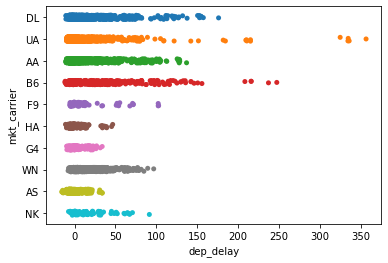

In [113]:
sns.stripplot(x='dep_delay',y='mkt_carrier',data=data)

<AxesSubplot:>

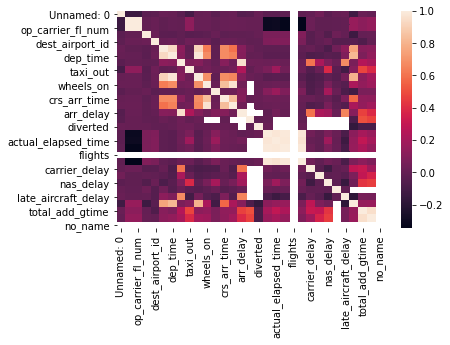

In [114]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr)

In [115]:
X = data.drop(columns='arr_delay')

<AxesSubplot:>

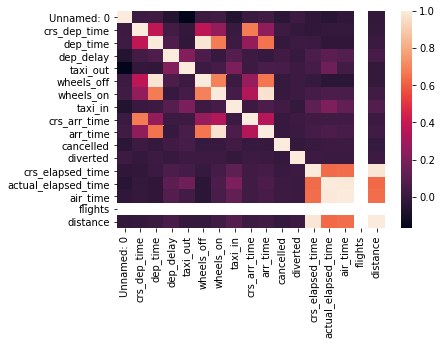

In [116]:
Xcorr = X.corr()
sns.heatmap(Xcorr)

In [117]:
data['flights'].unique()

array([1.])